## Necessary librairies 

In [26]:
import pandas as pd
import numpy as np
import math
import json 

In [110]:
games_scored=pd.read_csv('./Games_Scored.csv', sep=',')
game_dataframe=pd.read_csv('./games_info_dataframe.csv')

In [111]:
games_scored.drop(games_scored.columns[0],axis=1,inplace=True)

In [38]:
games_scored

,GoldDiffEnd,ADRDiffEnd,StructuresDiff,DragonsDiff,Barons_HeraldsDiff,gameScore,esportsPlatformId
0,6.713765,1.277407,4.196205,0.385616,0.204272,12.777264,ESPORTSTMNT01:3300424
1,-1.961324,-0.795549,-2.241552,0.181074,1.214780,-3.602571,ESPORTSTMNT01:3300430
2,-3.266862,-0.451174,-2.241552,-0.023468,0.204272,-5.778784,ESPORTSTMNT01:3300455
3,5.790736,0.967419,4.553858,0.590157,-0.806237,11.095933,ESPORTSTMNT01:3300478
4,1.748492,0.276803,-0.453286,-0.228009,-1.143073,0.200926,ESPORTSTMNT01:3300763
...,...,...,...,...,...,...,...
5242,-4.261125,-0.917871,-1.526246,-0.841634,-0.132565,-7.679440,LPL_A:343971
5243,-5.905136,-9.310426,-4.029818,-0.228009,0.204272,-19.269117,LPL_A:343972
5244,5.828296,6.314159,3.838552,0.590157,-0.469401,16.101764,LPL_A:343990
5245,-1.278335,-0.523375,-1.168593,0.181074,-0.469401,-3.258630,LPL_A:343995


In [112]:
games_scored=games_scored.merge(game_dataframe[['winner','esportsPlatformId']],on='esportsPlatformId')

In [113]:
games_scored['winner']=games_scored['winner'].apply(lambda x : 0 if x=='red' else 1)

In [114]:
games_scored

,GoldDiffEnd,ADRDiffEnd,StructuresDiff,DragonsDiff,Barons_HeraldsDiff,gameScore,esportsPlatformId,winner
0,6.713765,1.277407,4.196205,0.385616,0.204272,12.777264,ESPORTSTMNT01:3300424,0
1,-1.961324,-0.795549,-2.241552,0.181074,1.214780,-3.602571,ESPORTSTMNT01:3300430,1
2,-3.266862,-0.451174,-2.241552,-0.023468,0.204272,-5.778784,ESPORTSTMNT01:3300455,1
3,5.790736,0.967419,4.553858,0.590157,-0.806237,11.095933,ESPORTSTMNT01:3300478,0
4,1.748492,0.276803,-0.453286,-0.228009,-1.143073,0.200926,ESPORTSTMNT01:3300763,0
...,...,...,...,...,...,...,...,...
5242,-4.261125,-0.917871,-1.526246,-0.841634,-0.132565,-7.679440,LPL_A:343971,1
5243,-5.905136,-9.310426,-4.029818,-0.228009,0.204272,-19.269117,LPL_A:343972,1
5244,5.828296,6.314159,3.838552,0.590157,-0.469401,16.101764,LPL_A:343990,0
5245,-1.278335,-0.523375,-1.168593,0.181074,-0.469401,-3.258630,LPL_A:343995,1


In [115]:
with open('./esports-data/mapping_data.json') as f:
    mapping_data=json.load(f)
with open('./esports-data/teams.json') as f:
    teams=json.load(f)
with open('./esports-data/tournaments.json') as f:
    tournaments=json.load(f)

In [116]:
# to get mappings team_id - platformGameId
teams_mapping=[]
for entry in mapping_data:
    platformgameid=entry.get('platformGameId')
    teammapping=entry.get("teamMapping")
    red_team=teammapping.get('200')
    blue_team=teammapping.get('100')
    dict_mapping={'esportsPlatformId': platformgameid, 'red_team_id' : red_team, 'blue_team_id' : blue_team}
    teams_mapping.append(dict_mapping)
    
teams_mapping_df=pd.DataFrame(teams_mapping)
# to get acronyms 
teams_names=[]

for team in teams:
    team_id=team.get('team_id')
    team_acronym=team.get('acronym')
    dict_names={'team_id' : team_id, 'acronym' : team_acronym}
    teams_names.append(dict_names)

teams_names_df=pd.DataFrame(teams_names)

In [117]:
games_scored=games_scored.merge(teams_mapping_df,on='esportsPlatformId')

In [118]:
team_id_to_acronym = pd.Series(teams_names_df.acronym.values, index=teams_names_df.team_id).to_dict()
games_scored['blue_acronym'] = games_scored['blue_team_id'].map(team_id_to_acronym)
games_scored['red_acronym'] = games_scored['red_team_id'].map(team_id_to_acronym)

In [119]:
games_scored

,GoldDiffEnd,ADRDiffEnd,StructuresDiff,DragonsDiff,Barons_HeraldsDiff,gameScore,esportsPlatformId,winner,red_team_id,blue_team_id,blue_acronym,red_acronym
0,6.713765,1.277407,4.196205,0.385616,0.204272,12.777264,ESPORTSTMNT01:3300424,0,108361575122450254,109783164711873455,ZEN,TACO
1,-1.961324,-0.795549,-2.241552,0.181074,1.214780,-3.602571,ESPORTSTMNT01:3300430,1,109783170393931575,102141671183409133,MU,CNV
2,-3.266862,-0.451174,-2.241552,-0.023468,0.204272,-5.778784,ESPORTSTMNT01:3300455,1,109783136441695429,109783023470714128,TONY,MRGE
3,5.790736,0.967419,4.553858,0.590157,-0.806237,11.095933,ESPORTSTMNT01:3300478,0,109783124183318312,109783130654973406,GODL,UST
4,1.748492,0.276803,-0.453286,-0.228009,-1.143073,0.200926,ESPORTSTMNT01:3300763,0,109783160511364305,109782787975510889,N8V,CB
...,...,...,...,...,...,...,...,...,...,...,...,...
5242,-4.261125,-0.917871,-1.526246,-0.841634,-0.132565,-7.679440,LPL_A:343971,1,99566404853058754,99566404854685458,TES,WBG
5243,-5.905136,-9.310426,-4.029818,-0.228009,0.204272,-19.269117,LPL_A:343972,1,99566404854685458,99566404853058754,WBG,TES
5244,5.828296,6.314159,3.838552,0.590157,-0.469401,16.101764,LPL_A:343990,0,99566404853058754,98767991882270868,EDG,WBG
5245,-1.278335,-0.523375,-1.168593,0.181074,-0.469401,-3.258630,LPL_A:343995,1,99566404853058754,98767991882270868,EDG,WBG


In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = games_scored[['gameScore']]
Y = games_scored['winner']


model = LogisticRegression(max_iter=500, n_jobs=-1, C=0.01 , penalty ='l2' , solver='lbfgs')
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=42)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)


slope = model.coef_
intercept = model.intercept_

print({'accuracy' : accuracy , 'slope': slope , 'intercept' : intercept})

{'accuracy': 0.9866666666666667, 'slope': array([[-0.85910021]]), 'intercept': array([0.50922942])}


c:\Users\Natsu\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


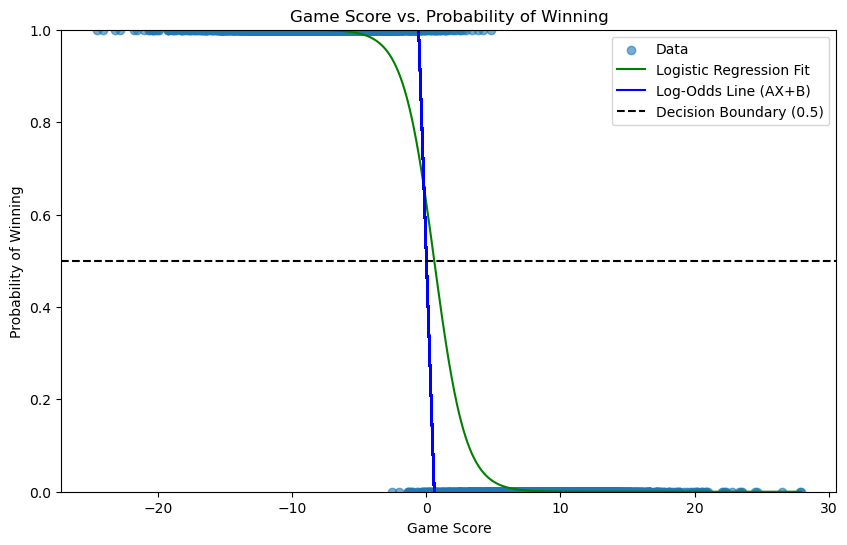

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Data', alpha=0.6)

log_odds = model.coef_[0][0] * X + model.intercept_[0]
prob_odds=1/(1+np.exp(-log_odds))

game_scores_plot = np.linspace(X['gameScore'].min(), X['gameScore'].max(), 1000).reshape(-1, 1)
probabilities = model.predict_proba(game_scores_plot)[:, 1]


plt.plot(game_scores_plot, probabilities , label='Logistic Regression Fit', color='green')
plt.plot(X, log_odds, label='Log-Odds Line (AX+B)', color='blue')




plt.xlabel('Game Score')
plt.ylabel('Probability of Winning')
plt.title('Game Score vs. Probability of Winning')
plt.axhline(y=0.5, color='k', linestyle='--', label='Decision Boundary (0.5)')
plt.ylim(0,1)


plt.legend()
plt.show()

## Final Data Preparation before elo rating 

In [198]:
list_of_downloaded_games=games_scored['esportsPlatformId'].unique()
with open('./esports-data/mapping_data_cleaned.json') as f :
    mapping_data=json.load(f)
with open('revamped-tourneys.json') as f :
    tournaments=json.load(f)
with open('./esports-data/leagues-cleaned.json') as f :
    leagues=json.load(f)
games_riot_data = []
esports_to_platform_mapping = {str(esport_id): platform_id for esport_id, platform_id in zip(mapping_data['esportsGameId'].values(), mapping_data['PlatformGameId'].values())}
for tournament in tournaments:
    start_date = tournament.get("startDate", "")
        
    for stage in tournament["stages"]:
            for section in stage["sections"]:
                for match in section["matches"]:
                    for game in match["games"]:
                        if game["state"] == "completed":
                            game_id = game.get('id',None)
                            
                            platform_game_id =  esports_to_platform_mapping.get(game_id)
                            # if platform_game_id in list_of_downloaded_games:
                            if platform_game_id in list_of_downloaded_games:
                                game_leaguetag = tournament.get('leagueName',None)
                                game_leagueid = tournament.get('leagueId',None)
                                game_leaguestage = tournament.get('name',None)
                                game_toursection = section.get('name',None)
                                blue_team = None
                                red_team = None
                                winner = None
                                for team in game["teams"]:
                                    blue_team = team.get('id') if team.get('side',None)=='blue' else blue_team
                                    red_team = team.get('id') if team.get('side',None)=='red' else red_team
                                    winner = team.get('side',None) if team.get('result',{}).get('outcome') == 'win' else winner
                                game_num = game.get('number',1)
                                tourney_id = tournament.get('id',None)



                                games_riot_data.append({
                                    'leagueId': game_leagueid,
                                    'leagueLabel': game_leaguetag,
                                    'year':start_date[:4],
                                    'stageTournament':game_leaguestage,
                                    'stageRound':game_toursection,
                                    'gameId':game_id,
                                    'gameNumber':game_num,
                                    'platformGameId':platform_game_id,
                                    'blue':blue_team,
                                    'red':red_team,
                                    'winner':winner
                                })
                            else :
                                continue
                            
games_df = pd.DataFrame(games_riot_data)

In [204]:
games_df.loc[games_df.stageRound=='regional_qualifier','stageRound'] = 'Playoffs'
games_df.drop(games_df[games_df['stageRound']=='All-Star Exhibition'].index,inplace=True)
games_df.loc[games_df.stageRound=='play_in_knockouts','stageRound'] = 'Play In Knockouts'
games_df.loc[games_df.stageRound=='round_1','stageRound']='Regular Season'
games_df.loc[games_df.stageRound=='round_2','stageRound']='Regular Season'
games_df.loc[games_df.stageRound=='Group A','stageRound']='Group Stage'
games_df.loc[games_df.stageRound=='Group B','stageRound']='Group Stage'
games_df.loc[games_df.stageRound=='Group C','stageRound']='Group Stage'
games_df.loc[games_df.stageRound=='Group D','stageRound']='Group Stage'
games_df.loc[games_df.stageRound=='promotion','stageRound']='Promotion Qualifiers'
games_df.loc[games_df.stageRound=='bracket','stageRound']='Playoffs'
games_df.loc[games_df.stageRound=='knockouts','stageRound']='Playoffs'
games_df.loc[games_df.stageRound=='Groups','stageRound']='Group Stage'
games_df.loc[games_df.stageRound=='weekend_5','stageRound']='Regular Season'

In [218]:
scores_df = pd.read_csv('Games_Scored.csv')
scores_df=scores_df.drop(scores_df.columns[0],axis=1)
scores_df

,GoldDiffEnd,ADRDiffEnd,StructuresDiff,DragonsDiff,Barons_HeraldsDiff,gameScore,esportsPlatformId
0,-4.741227,-0.496573,-3.580539,-0.761033,0.492580,-9.086792,ESPORTSTMNT01:3294091
1,8.653082,1.657723,4.988121,0.701965,-1.040815,14.960076,ESPORTSTMNT01:3294102
2,-3.451364,-0.279000,-3.580539,-0.273367,1.105938,-6.478333,ESPORTSTMNT01:3294114
3,-4.283735,-1.588088,-3.191054,-1.248699,-0.427457,-10.739033,ESPORTSTMNT01:3294128
4,5.654889,0.844940,3.819668,0.701965,-1.347494,9.673968,ESPORTSTMNT01:3294129
...,...,...,...,...,...,...,...
7186,-4.062046,-0.687489,-1.633116,-1.004866,-0.120778,-7.508295,LPL_A:343971
7187,-5.642927,-7.071254,-4.359508,-0.273367,0.185901,-17.161155,LPL_A:343972
7188,5.639944,4.813528,4.209152,0.701965,-0.427457,14.937132,LPL_A:343990
7189,-1.193794,-0.387417,-1.243632,0.214299,-0.427457,-3.038001,LPL_A:343995


In [219]:
dates = pd.read_csv('games_info_dataframe.csv')
dates = dates[['esportsPlatformId','gameDate']].copy()
scores_df = scores_df.merge(right=dates,how='left',on='esportsPlatformId')
scores_df=scores_df.drop(scores_df.columns[0:5],axis=1)


,gameScore,esportsPlatformId,gameDate
0,-9.086792,ESPORTSTMNT01:3294091,2023-01-21 21:07:57.219000+00:00
1,14.960076,ESPORTSTMNT01:3294102,2023-01-21 22:04:04.041000+00:00
2,-6.478333,ESPORTSTMNT01:3294114,2023-01-21 23:44:55.387000+00:00
3,-10.739033,ESPORTSTMNT01:3294128,2023-01-22 01:10:14.753000+00:00
4,9.673968,ESPORTSTMNT01:3294129,2023-01-22 01:42:33.793000+00:00
...,...,...,...
7186,-7.508295,LPL_A:343971,2023-08-07 10:13:39.522000+00:00
7187,-17.161155,LPL_A:343972,2023-08-07 11:11:51.015000+00:00
7188,14.937132,LPL_A:343990,2023-08-08 09:21:12.797000+00:00
7189,-3.038001,LPL_A:343995,2023-08-08 10:10:59.294000+00:00


In [220]:
games_df.rename(columns={'platformGameId':'esportsPlatformId'},inplace=True)

In [222]:
games_df = games_df.merge(right=scores_df,how='left',on='esportsPlatformId')

0

In [225]:
games_df = games_df.sort_values(by='gameDate',ascending=True)
games_df

,leagueId,leagueLabel,year,stageTournament,stageRound,gameId,gameNumber,esportsPlatformId,blue,red,winner,gameScore,gameDate
126,98767991335774720,LCK Challengers,2023,Spring 2023,Regular Season,109625523804970554,1,ESPORTSTMNT06:2762079,105550054006182911,105550033967461806,blue,-7.950321,2023-01-16 05:16:23.992000+00:00
127,98767991335774720,LCK Challengers,2023,Spring 2023,Regular Season,109625578822531913,2,ESPORTSTMNT06:2763076,105550054006182911,105550033967461806,blue,-7.103971,2023-01-16 06:06:10.151000+00:00
168,98767991335774720,LCK Challengers,2023,Spring 2023,Regular Season,109625523804970588,1,ESPORTSTMNT06:2762099,105550047979361273,105550042327365041,red,10.892013,2023-01-16 08:10:28.804000+00:00
169,98767991335774720,LCK Challengers,2023,Spring 2023,Regular Season,109625578822531947,2,ESPORTSTMNT06:2763092,105550042327365041,105550047979361273,red,9.438108,2023-01-16 09:09:51.164000+00:00
170,98767991335774720,LCK Challengers,2023,Spring 2023,Regular Season,109625578822531948,3,ESPORTSTMNT06:2761091,105550047979361273,105550042327365041,blue,-7.415900,2023-01-16 10:04:56.458000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4885,100695891328981120,EMEA Masters,2023,Summer 2023,Playoffs,110535609417095407,1,ESPORTSTMNT05:3239540,105536918475957734,105593951536470384,blue,-2.576491,2023-08-28 14:54:00+00:00
4889,100695891328981120,EMEA Masters,2023,Summer 2023,Playoffs,110535609417095414,2,ESPORTSTMNT05:3239544,107450819235010833,103877625775457850,red,2.918468,2023-08-28 15:40:00+00:00
4886,100695891328981120,EMEA Masters,2023,Summer 2023,Playoffs,110535609417095408,2,ESPORTSTMNT05:3240571,105536918475957734,105593951536470384,blue,-7.385879,2023-08-28 15:50:00+00:00
4890,100695891328981120,EMEA Masters,2023,Summer 2023,Playoffs,110535609417095415,3,ESPORTSTMNT05:3240572,103877625775457850,107450819235010833,blue,-7.701803,2023-08-28 16:34:00+00:00


In [ ]:
games_df.loc[games_df.stageTournament=='european-masters-spring-2020','stageTournament']='EU Masters Spring 2020'
games_df.loc[games_df.stageTournament=='eu_masters_summer_2020','stageTournament']='EU Masters'
games_df.loc[games_df.stageTournament=='opl_split2_2020','stageTournament']='OPL 2020 Split 2'
games_df.loc[games_df.stageTournament=='lla-closing-2020','stageTournament']='LLA Closing 2020'



## K Scoring 

In [229]:
k_score_leagues = {
    'LEC': 40,
    'LCS': 40,
    'CBLOL': 30,
    'LCO': 30,
    'TCL': 30,
    'LCK': 40,
    'LJL': 30,
    'LLA': 30,
    'EMEA Masters': 20,
    'PCS': 30,
    'Worlds': 60,
    'LCL': 30,
    'MSI': 50,
    'VCS': 30,
    'LCK Academy': 20,
    'LPL': 40
}

games_df['kScore'] = games_df.leagueLabel.apply(lambda x: k_score_leagues.get(x,10))
games_df['kMult'] = games_df.stageRound.apply(lambda x: 1.2 if x == 'Playoffs' else 1)
games_df.loc[(games_df.leagueLabel=='TCL') & (games_df.year=='2023'),'kScore'] = 10

In [230]:
games_df.blue = games_df.blue.astype('int64')
games_df.red = games_df.red.astype('int64')

games_df.to_csv('process_everything.csv',sep=";",index=None)

In [231]:
def k_factor (k_score, gameScore):

    adj_factor = gameScore/10
    if (adj_factor*1.33157 + 0.358061 > 0):
        try:
            #If we can calculate how our game score affects things,
            res = (0.682321)*np.log(adj_factor*1.33157 + 0.358061) + 0.696658

            #We limit the amount of point a team
            #is denied to 80% maximum.
            
            if res < -0.8:
                res = -0.8

            return k_score*(1+res)

        except:
            return k_score/5

    return k_score/5

In [232]:
def elo_formula(blue_id, red_id, winner, game_date, k_score,
                tour_label, tourney, stage_name, year,league_id,
                crush_score=0, blue_rating=1200,  red_rating=1200,
                game_score=0, bo3=False, bo5=False,
                game_num=1):
    '''The function calculates and updates Elo ratings for all known games.
    All teams will start at 1200 Elo in our formula, where we define "1200"
    as a baseline score. Over time, the scores will evolve to reflect a team's
    current rating.

    At this point, we don't know whether crush score can be implemented, or if
    we will take bo3/bo5 status under account.'''

    res_dict = {
        'blue':(1,0),
        'red':(0,1)
    }

    if type(winner) == str:
        result_blue, result_red = res_dict.get(winner.lower())
    elif type(winner) == int:
        result_blue, result_red = (1-winner, winner)

    if result_blue == 1:
        game_score = -game_score #Flip the sign, get the true game score.
        #Blue victories from our scoring system are usually negative numbers,
        #unless the red team threw intergalactically hard. (A team can win
        #despite a negative score)

    #The K-score gets a pretty brutal adjustment depending on the game score.
    adjusted_k_score = k_factor(k_score,game_score)

    rating_delta_blue = blue_rating - red_rating
    rating_delta_red = -rating_delta_blue
    expected_result_blue = 1/(10**(-rating_delta_blue/400) + 1)
    expected_result_red = 1/(10**(-rating_delta_red/400) + 1)
    new_rating_blue = blue_rating + (adjusted_k_score * (result_blue - expected_result_blue))
    new_rating_red = red_rating + (adjusted_k_score * (result_red - expected_result_red))

    res_blue = {
        'leagueId':league_id,
        'leagueLabel': tour_label,
        'stageTournament': tourney,
        'stageName': stage_name,
        'year': year,
        'date':game_date,
        'game_num':game_num,
        'team': blue_id,
        'rating': new_rating_blue
    }
    res_red = {
        'leagueId':league_id,
        'leagueLabel': tour_label,
        'stageTournament': tourney,
        'stageName': stage_name,
        'year': year,
        'date':game_date,
        'game_num':game_num,
        'team': red_id,
        'rating': new_rating_red}

    return res_blue, res_red

In [233]:
year_selected = "2023"
games_df = games_df[games_df.gameDate.str.startswith(year_selected)]



rating_list = []
elo_log = {}

elo_tiers = {
    10: 1200,
    20: 1500,
    30: 1800,
    40: 2100,
    50: 2100,
    60: 2100
}

for index, row in games_df.iterrows():
    #Starting values at 1200 for elos
    old_blue_rating = elo_log.get(row['blue'],elo_tiers.get(row['kScore'],1200))
    old_red_rating = elo_log.get(row['red'],elo_tiers.get(row['kScore'],1200))

    elo_blue, elo_red = elo_formula(row.blue, row.red, \
        row.winner, row.gameDate, (row.kScore * row.kMult), row.leagueLabel,\
        row.stageTournament, row.stageRound, year_selected,row.leagueId, 0, old_blue_rating, \
        old_red_rating, row.gameScore, False, False, row.gameNumber)
    elo_log.update({
        row.blue:elo_blue.get('rating',None),
        row.red:elo_red.get('rating',None)
        })
    rating_list.append(elo_blue)
    rating_list.append(elo_red)
    #except:
        #continue

df_rating = pd.DataFrame(rating_list)

In [234]:
df_rating

,leagueId,leagueLabel,stageTournament,stageName,year,date,game_num,team,rating
0,98767991335774720,LCK Challengers,Spring 2023,Regular Season,2023,2023-01-16 05:16:23.992000+00:00,1,105550054006182911,1209.671660
1,98767991335774720,LCK Challengers,Spring 2023,Regular Season,2023,2023-01-16 05:16:23.992000+00:00,1,105550033967461806,1190.328340
2,98767991335774720,LCK Challengers,Spring 2023,Regular Season,2023,2023-01-16 06:06:10.151000+00:00,2,105550054006182911,1218.538344
3,98767991335774720,LCK Challengers,Spring 2023,Regular Season,2023,2023-01-16 06:06:10.151000+00:00,2,105550033967461806,1181.461656
4,98767991335774720,LCK Challengers,Spring 2023,Regular Season,2023,2023-01-16 08:10:28.804000+00:00,1,105550047979361273,1189.495514
...,...,...,...,...,...,...,...,...,...
9777,100695891328981120,EMEA Masters,Summer 2023,Playoffs,2023,2023-08-28 15:50:00+00:00,2,105593951536470384,1384.418736
9778,100695891328981120,EMEA Masters,Summer 2023,Playoffs,2023,2023-08-28 16:34:00+00:00,3,103877625775457850,1420.159812
9779,100695891328981120,EMEA Masters,Summer 2023,Playoffs,2023,2023-08-28 16:34:00+00:00,3,107450819235010833,1324.433963
9780,100695891328981120,EMEA Masters,Summer 2023,Playoffs,2023,2023-08-28 16:42:00+00:00,3,105593951536470384,1369.935477
